In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:
stock_data = pd.read_excel('../index_Infomation_v0.1.xlsx')
stock_data = stock_data[['Date', 'apple_Close', 'nasdaq_Close']]
stock_data.loc[:, 'Date'] = pd.to_datetime(stock_data['Date'])
stock_data.head()

,Date,apple_Close,nasdaq_Close
0,2014-11-01 00:00:00,27.000,4630.74023
1,2014-11-02 00:00:00,27.000,4630.74023
2,2014-11-03 00:00:00,27.350,4638.91015
3,2014-11-04 00:00:00,27.150,4623.64013
4,2014-11-05 00:00:00,27.215,4620.72021


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3530 entries, 0 to 3529
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3530 non-null   object 
 1   apple_Close   3530 non-null   float64
 2   nasdaq_Close  3530 non-null   float64
dtypes: float64(2), object(1)
memory usage: 82.9+ KB


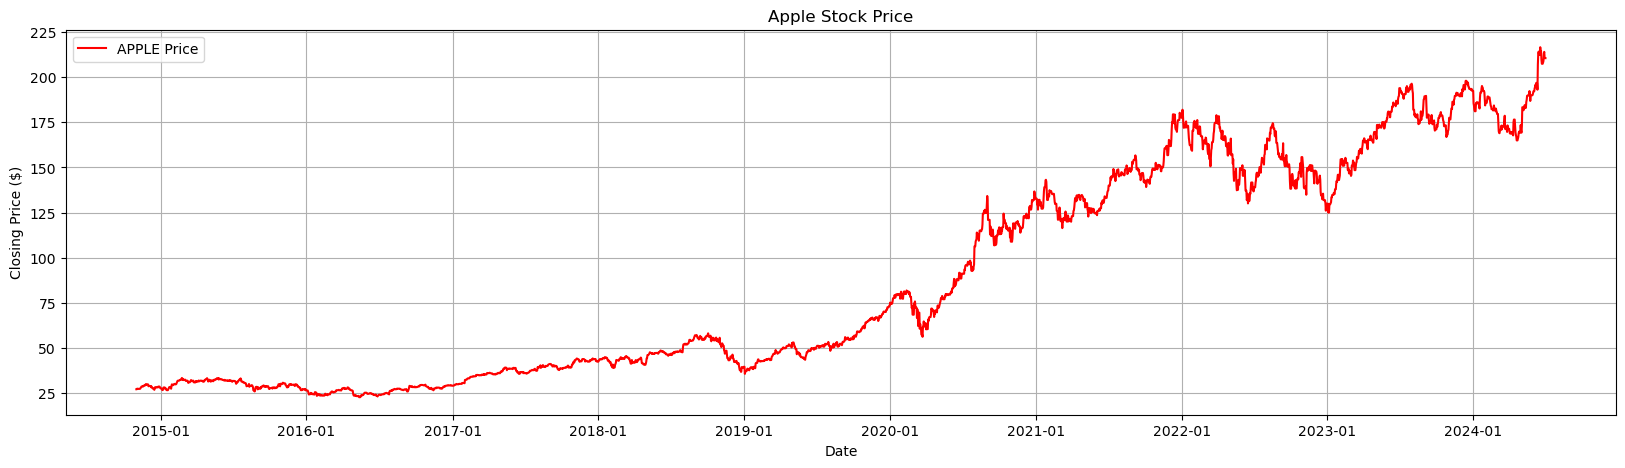

In [9]:
plt.figure(figsize=(20, 5))
plt.plot(stock_data['Date'], stock_data['apple_Close'], label='APPLE Price', color='red')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.grid(True)
plt.show()

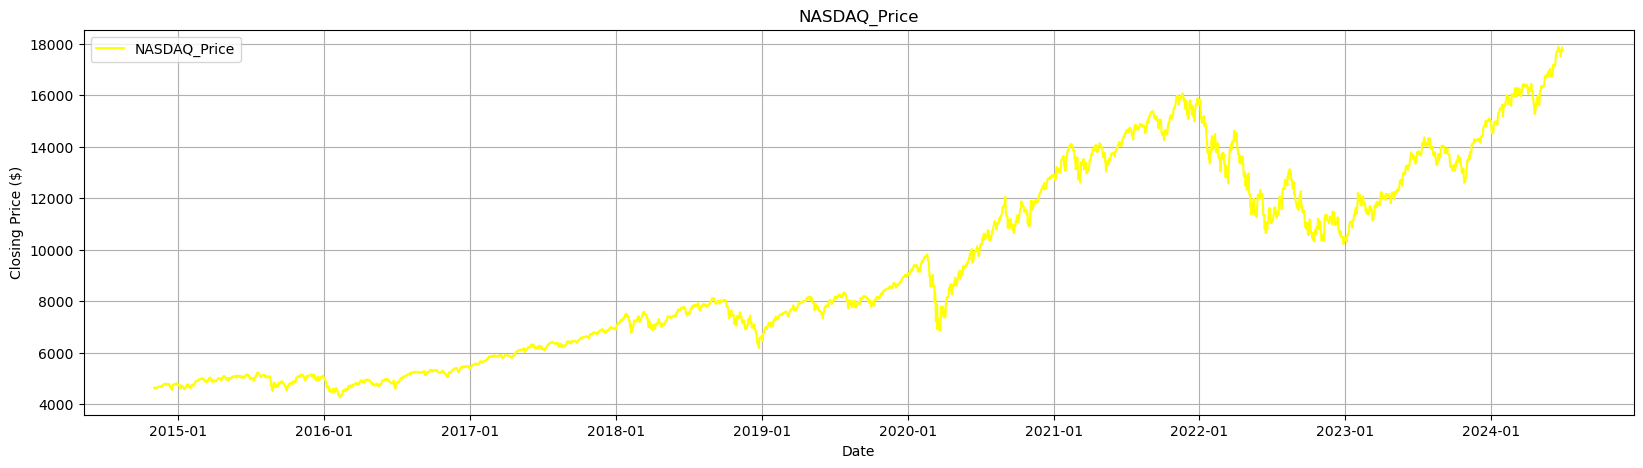

In [10]:
plt.figure(figsize=(20,5))
plt.plot(stock_data['Date'], stock_data['nasdaq_Close'], label='NASDAQ_Price', color='yellow')
plt.title('NASDAQ_Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# 0과 1사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

stock_data['apple_Close'] = normalize(stock_data, 'apple_Close')
stock_data['nasdaq_Close'] = normalize(stock_data, 'nasdaq_Close')

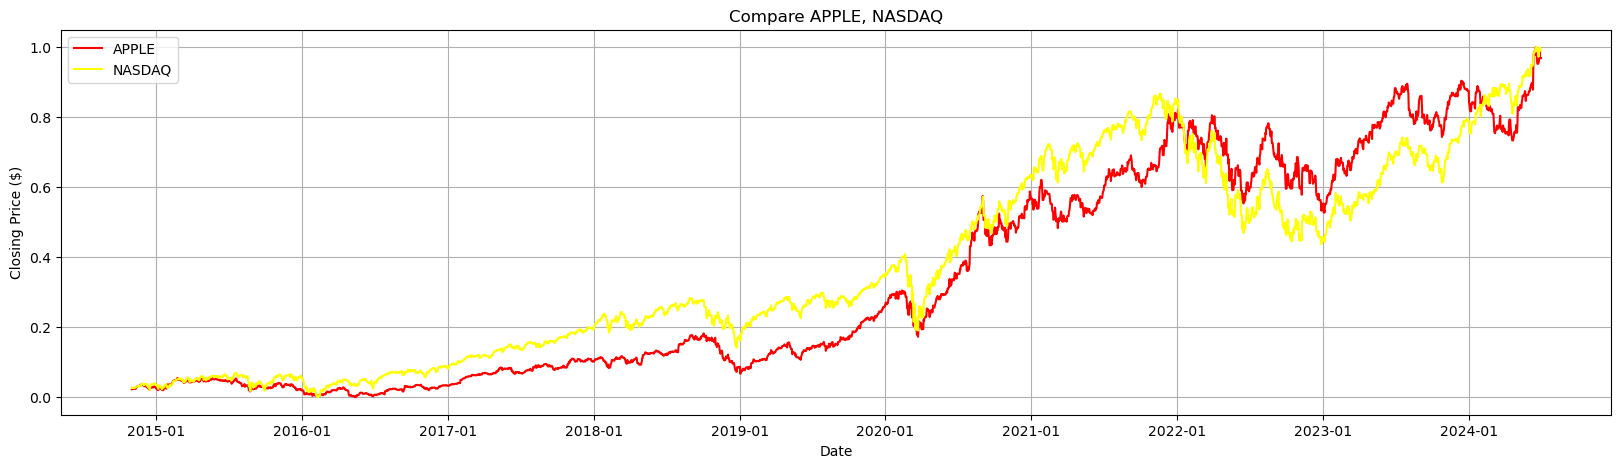

In [12]:
# 정규화 적용 두 그래프 합치기
plt.figure(figsize = (20, 5))
plt.plot(stock_data['Date'], stock_data['apple_Close'], label = 'APPLE', color='red')
plt.plot(stock_data['Date'], stock_data['nasdaq_Close'], label = 'NASDAQ', color = 'yellow')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Compare APPLE, NASDAQ')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Calculate the correlation
correlation = stock_data['apple_Close'].corr(stock_data['nasdaq_Close'])
print(f"Correlation between Exchange Ratio and Samsung Stock Price: {correlation:.2f}")

Correlation between Exchange Ratio and Samsung Stock Price: 0.96


In [14]:
fluctuation_apple = stock_data['apple_Close'].pct_change()
fluctuation_nasdaq = stock_data['nasdaq_Close'].pct_change()

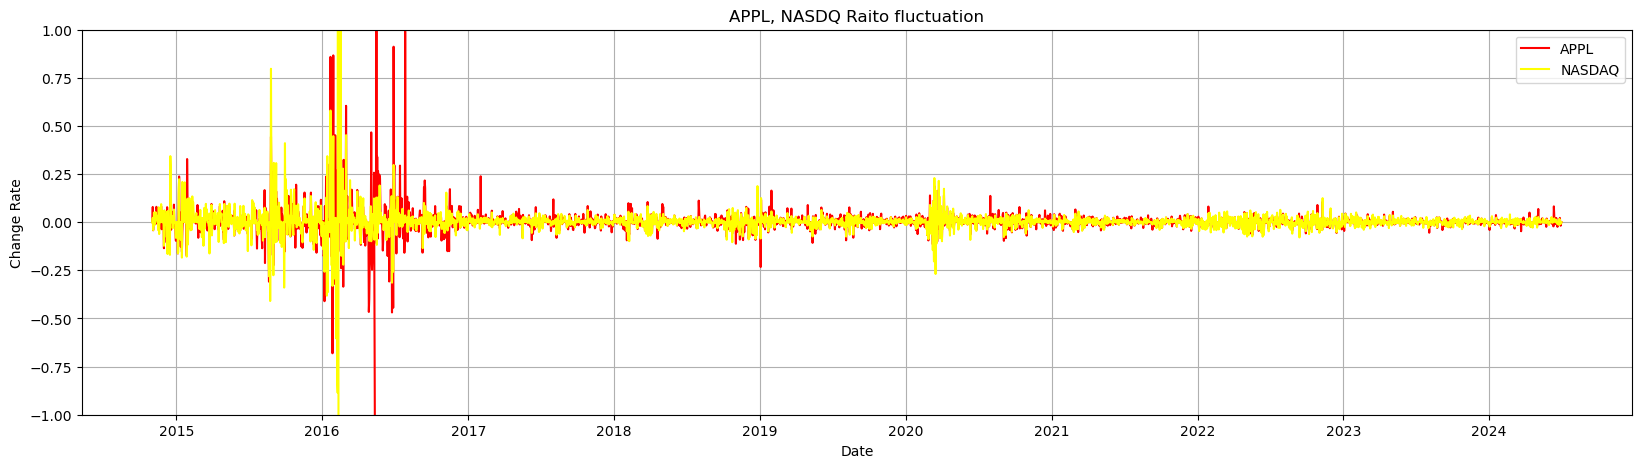

In [15]:
plt.figure(figsize = (20, 5))
plt.plot(stock_data['Date'], fluctuation_apple, label = 'APPL', color='red')
plt.plot(stock_data['Date'], fluctuation_nasdaq, label = 'NASDAQ', color='yellow')
plt.ylim(-1, 1)
plt.title('APPL, NASDQ Raito fluctuation')
plt.xlabel('Date')
plt.ylabel('Change Rate')
plt.legend()
plt.grid(True)
plt.show()

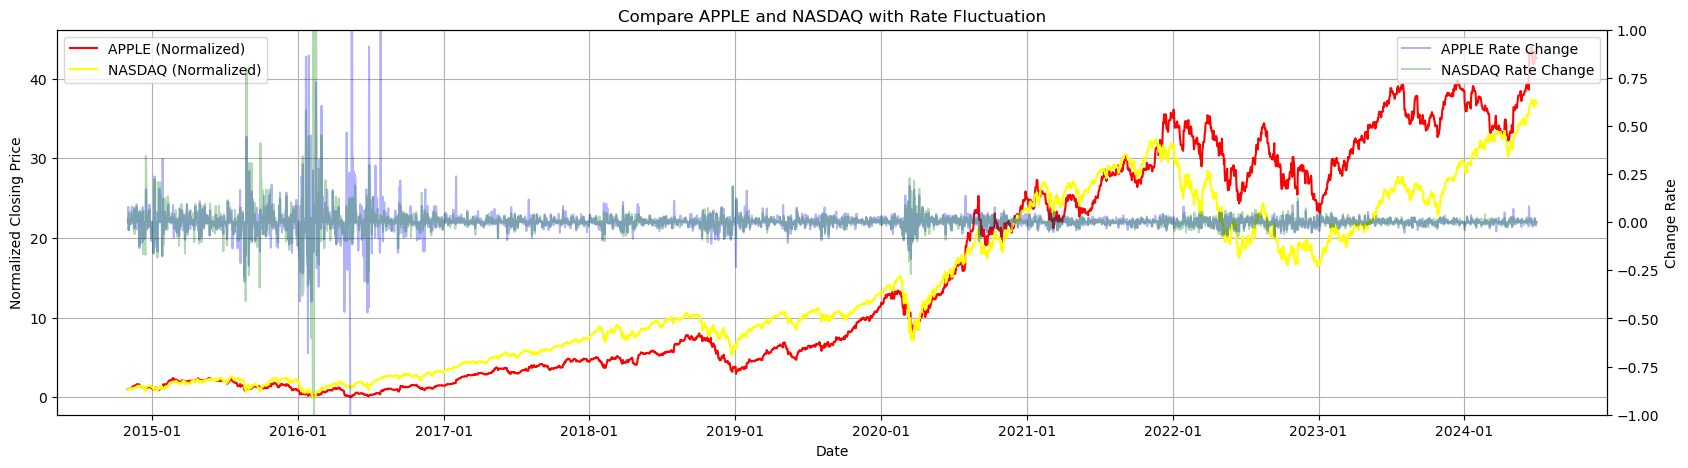

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 가상의 데이터 예시
# stock_data = pd.read_csv('your_data.csv')

# 정규화된 주가 데이터
stock_data['norm_apple_Close'] = stock_data['apple_Close'] / stock_data['apple_Close'].iloc[0]
stock_data['norm_nasdaq_Close'] = stock_data['nasdaq_Close'] / stock_data['nasdaq_Close'].iloc[0]

# 변동률 계산
fluctuation_apple = stock_data['apple_Close'].pct_change()
fluctuation_nasdaq = stock_data['nasdaq_Close'].pct_change()

# 플롯 그리기
fig, ax1 = plt.subplots(figsize=(20, 5))

# 첫 번째 y축 (정규화된 주가)
ax1.plot(stock_data['Date'], stock_data['norm_apple_Close'], label='APPLE (Normalized)', color='red')
ax1.plot(stock_data['Date'], stock_data['norm_nasdaq_Close'], label='NASDAQ (Normalized)', color='yellow')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Price')
ax1.set_title('Compare APPLE and NASDAQ with Rate Fluctuation')
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend(loc='upper left')
ax1.grid(True)

# 두 번째 y축 (변동률)
ax2 = ax1.twinx()
ax2.plot(stock_data['Date'], fluctuation_apple, label='APPLE Rate Change', color='blue', alpha=0.3)
ax2.plot(stock_data['Date'], fluctuation_nasdaq, label='NASDAQ Rate Change', color='green', alpha=0.3)
ax2.set_ylabel('Change Rate')
ax2.set_ylim(-1, 1)
ax2.legend(loc='upper right')

plt.show()


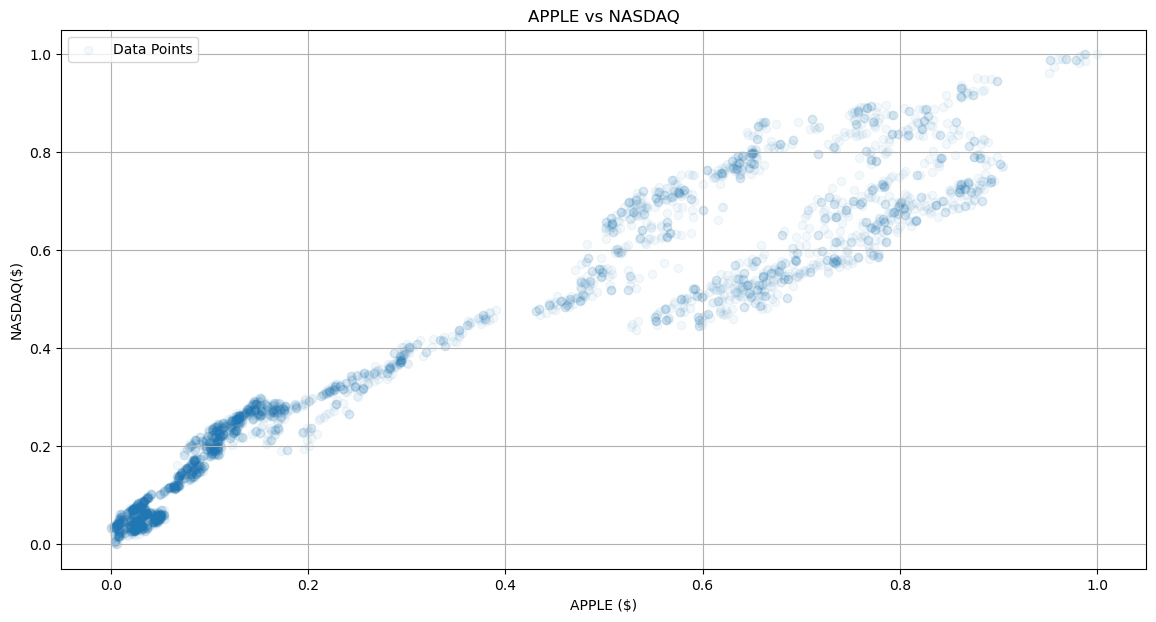

In [17]:
# 산점도 그래프

plt.figure(figsize = (14, 7))
plt.scatter(stock_data['apple_Close'], stock_data['nasdaq_Close'], alpha = 0.05, label = 'Data Points')

plt.title('APPLE vs NASDAQ')
plt.xlabel('APPLE ($)')
plt.ylabel('NASDAQ($)')

plt.legend()
plt.grid(True)

plt.show()

In [20]:
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:            apple_Close   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 3.920e+04
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:56:36   Log-Likelihood:                 3591.6
No. Observations:                3530   AIC:                            -7179.
Df Residuals:                    3528   BIC:                            -7167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0565      0.002    -22.791   

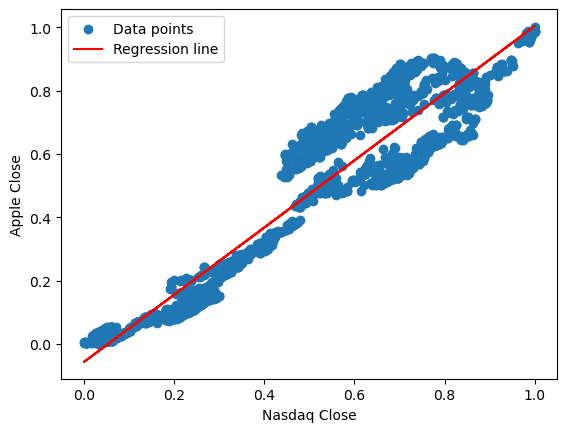

In [21]:
# 선형 회귀 분석
X = stock_data['nasdaq_Close']
y = stock_data['apple_Close']
X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# 회귀 분석 결과 출력
print(model.summary())

# 산점도 및 회귀선 그래프
plt.scatter(stock_data['nasdaq_Close'], stock_data['apple_Close'], label='Data points')
plt.plot(stock_data['nasdaq_Close'], predictions, color='red', label='Regression line')
plt.xlabel('Nasdaq Close')
plt.ylabel('Apple Close')
plt.legend()
plt.show()

In [25]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests

In [26]:
# Granger causality test
max_lag = 2  # 최대 시차
test_result = grangercausalitytests(stock_data[['apple_Close', 'nasdaq_Close']], max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7008  , p=0.1004  , df_denom=3526, df_num=1
ssr based chi2 test:   chi2=2.7031  , p=0.1002  , df=1
likelihood ratio test: chi2=2.7020  , p=0.1002  , df=1
parameter F test:         F=2.7008  , p=0.1004  , df_denom=3526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4521  , p=0.0318  , df_denom=3523, df_num=2
ssr based chi2 test:   chi2=6.9139  , p=0.0315  , df=2
likelihood ratio test: chi2=6.9071  , p=0.0316  , df=2
parameter F test:         F=3.4521  , p=0.0318  , df_denom=3523, df_num=2


c:\Anaconda\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [27]:
# 공적분 분석
def johansen_test(df, det_order=-1, k_ar_diff=1):
    result = coint_johansen(df, det_order, k_ar_diff)
    return result

coint_result = johansen_test(stock_data[['apple_Close', 'nasdaq_Close']])
print(coint_result.lr1)  # Trace statistic
print(coint_result.cvt)  # Critical values

[8.69784359 0.99385486]
[[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]


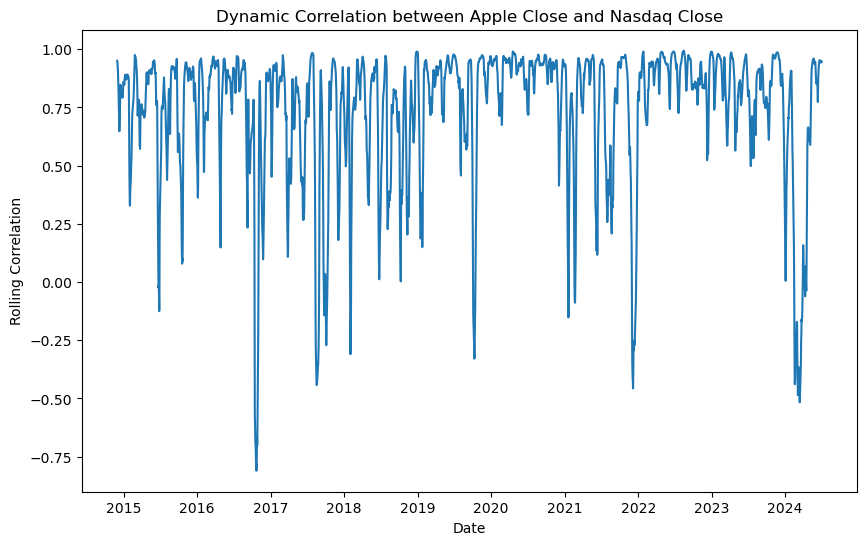

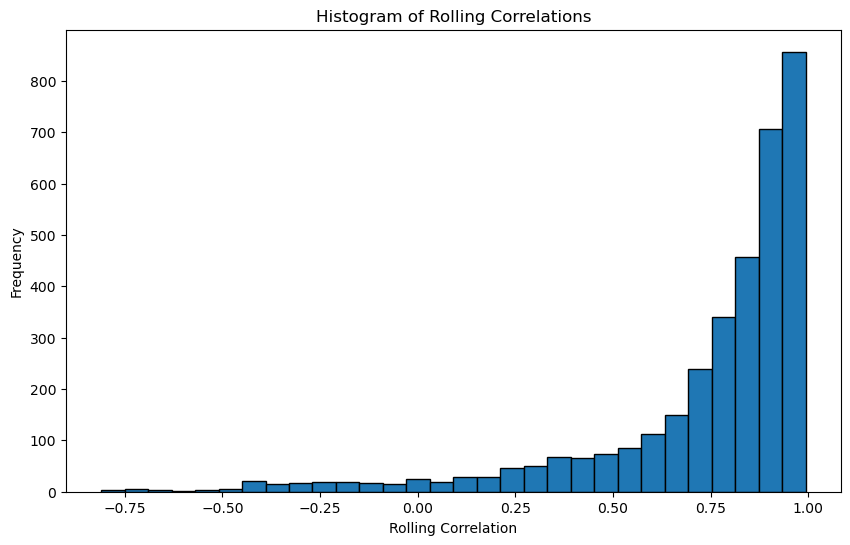


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7008  , p=0.1004  , df_denom=3526, df_num=1
ssr based chi2 test:   chi2=2.7031  , p=0.1002  , df=1
likelihood ratio test: chi2=2.7020  , p=0.1002  , df=1
parameter F test:         F=2.7008  , p=0.1004  , df_denom=3526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4521  , p=0.0318  , df_denom=3523, df_num=2
ssr based chi2 test:   chi2=6.9139  , p=0.0315  , df=2
likelihood ratio test: chi2=6.9071  , p=0.0316  , df=2
parameter F test:         F=3.4521  , p=0.0318  , df_denom=3523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8012  , p=0.0024  , df_denom=3520, df_num=3
ssr based chi2 test:   chi2=14.4321 , p=0.0024  , df=3
likelihood ratio test: chi2=14.4027 , p=0.0024  , df=3
parameter F test:         F=4.8012  , p=0.0024  , df_denom=3520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.9140  , p=0.

c:\Anaconda\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [30]:
# Rolling correlation calculation
window_size = 30
rolling_corr = stock_data['apple_Close'].rolling(window=window_size).corr(stock_data['nasdaq_Close']).dropna()

# Plot rolling correlation
plt.figure(figsize=(10, 6))
plt.plot(rolling_corr)
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.title('Dynamic Correlation between Apple Close and Nasdaq Close')
plt.show()

# Histogram of rolling correlations
plt.figure(figsize=(10, 6))
plt.hist(rolling_corr, bins=30, edgecolor='k')
plt.xlabel('Rolling Correlation')
plt.ylabel('Frequency')
plt.title('Histogram of Rolling Correlations')
plt.show()

# Granger causality test
max_lag = 5
granger_test_result = grangercausalitytests(stock_data[['apple_Close', 'nasdaq_Close']], max_lag, verbose=True)